In [2]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score



In [13]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=30, random_state=42)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

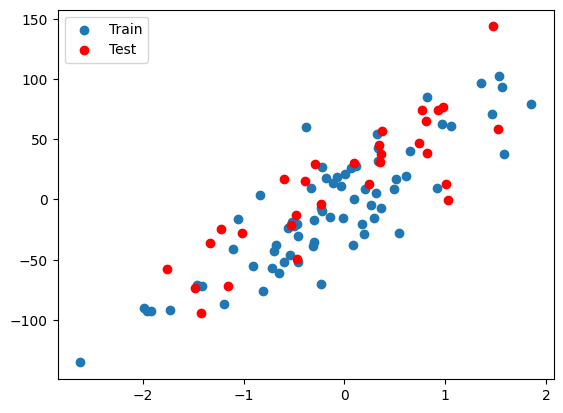

In [23]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, label='Train')
plt.scatter(x_test, y_test, label='Test', color='red')
plt.legend()
plt.show()

In [44]:
model = Sequential()
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.003)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 2635.5173 - mse: 2635.5173 - val_loss: 2893.6646 - val_mse: 2893.6646
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2604.2312 - mse: 2604.2312 - val_loss: 2862.2622 - val_mse: 2862.2622
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2576.0571 - mse: 2576.0571 - val_loss: 2826.2820 - val_mse: 2826.2820
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2539.3882 - mse: 2539.3882 - val_loss: 2782.8792 - val_mse: 2782.8792
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2494.3308 - mse: 2494.3308 - val_loss: 2728.7686 - val_mse: 2728.7686
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2444.5920 - mse: 2444.5920 - val_loss: 2660.9739 - val_mse: 2660.9739
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2379.0286 - mse: 2379.0286 - val_loss: 2578.6411 - val_mse: 2578.6411
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2309.4971 - mse: 2309.4971 - val_loss: 2480.42

In [46]:
# evaluate model 
_, train_mse = model.evaluate(x_train, y_train, verbose=0)
_, test_mse = model.evaluate(x_test, y_test, verbose=0)
print("Train: {}, Test: {}".format(train_mse, test_mse))

Train: 650.23583984375, Test: 944.4857177734375


In [47]:
pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


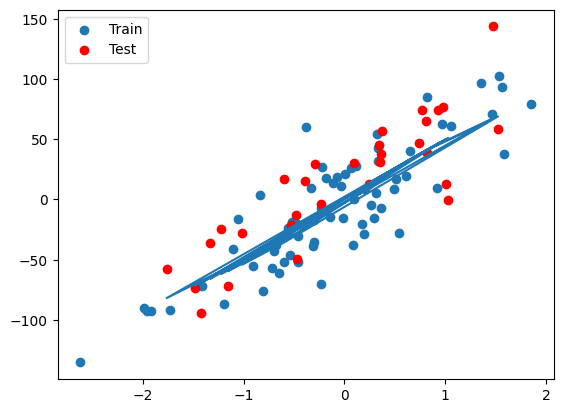

In [48]:
plt.scatter(x_train, y_train, label='Train')
plt.scatter(x_test, y_test, label='Test', color='red')
plt.plot(x_test, pred)
plt.legend()
plt.show()

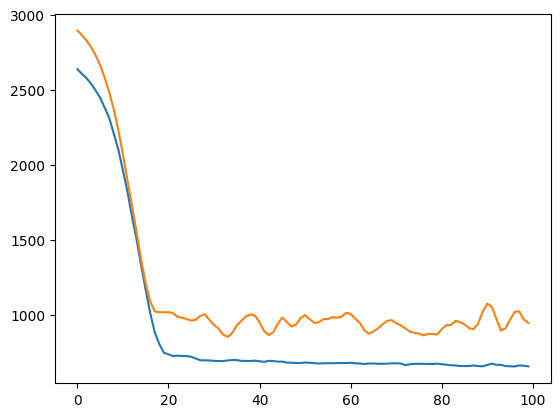

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Dropout

In [52]:
model = Sequential()
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.003)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])

In [53]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 2647.5544 - mse: 2647.5544 - val_loss: 2903.3643 - val_mse: 2903.3643
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2621.5107 - mse: 2621.5107 - val_loss: 2870.1506 - val_mse: 2870.1506
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2586.4302 - mse: 2586.4302 - val_loss: 2835.6433 - val_mse: 2835.6433
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2554.8608 - mse: 2554.8608 - val_loss: 2794.5142 - val_mse: 2794.5142
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2514.4119 - mse: 2514.4119 - val_loss: 2744.9585 - val_mse: 2744.9585
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2468.7566 - mse: 2468.7566 - val_loss: 2682.7568 - val_mse: 2682.7568
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2422.0322 - mse: 2422.0322 - val_loss: 2606.6890 - val_mse: 2606.6890
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2378.7764 - mse: 2378.7764 - val_loss: 2512.38